In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
# Only up until 2018 (basketball-reference.com)

salaryCapActual = pd.read_csv("salary_cap_85-18.csv", header = None)
salaryCapActual = salaryCapActual.drop(columns = [2])
salaryCapActual = salaryCapActual.set_index(0)
salaryCapActual.index.name = 'season'
salaryCapActual = salaryCapActual.rename(columns = {1 : 'Salary Cap'})
salaryCapActual

,Salary Cap
season,
1984-85,"$3,600,000"
1985-86,"$4,233,000"
1986-87,"$4,945,000"
1987-88,"$6,164,000"
1988-89,"$7,232,000"
1989-90,"$9,802,000"
1990-91,"$11,871,000"
1991-92,"$12,500,000"
1992-93,"$14,000,000"


Text(0.5, 0.98, 'NBA Salary Cap By Season')

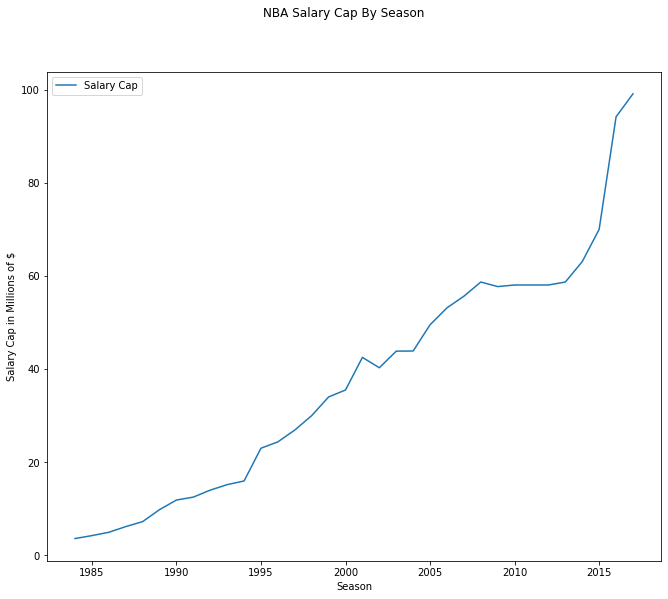

In [186]:
salaryPlot = salaryCapActual.reset_index()


salaryPlot['Salary Cap'] = salaryPlot['Salary Cap'].str.replace('$', '').str.replace(',', '').astype(int)
salaryPlot['Salary Cap'] = salaryPlot['Salary Cap'] / 1000000


salaryPlot['season'] = salaryPlot['season'].str.replace('-\d+', '')
salaryPlot['season'] = salaryPlot['season'].astype(int)

sPyear = salaryPlot['season']
sPcap = salaryPlot['Salary Cap']


salaryPlot.plot.line(x = 'season', y = 'Salary Cap', figsize = (11,9))


plt.xlabel('Season')
plt.ylabel('Salary Cap in Millions of $')
plt.suptitle('NBA Salary Cap By Season')





<ipython-input-232-65387f19d3a4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salDrop['salary'] = salDrop['salary'].str.replace('$', '').str.replace('\.00', '').str.replace('\,', '')
<ipython-input-232-65387f19d3a4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salDrop['salary'] = salDrop['salary'].astype(int)


Text(0.5, 0.98, 'NBA Average Team Spending vs. Salary Cap By Season')

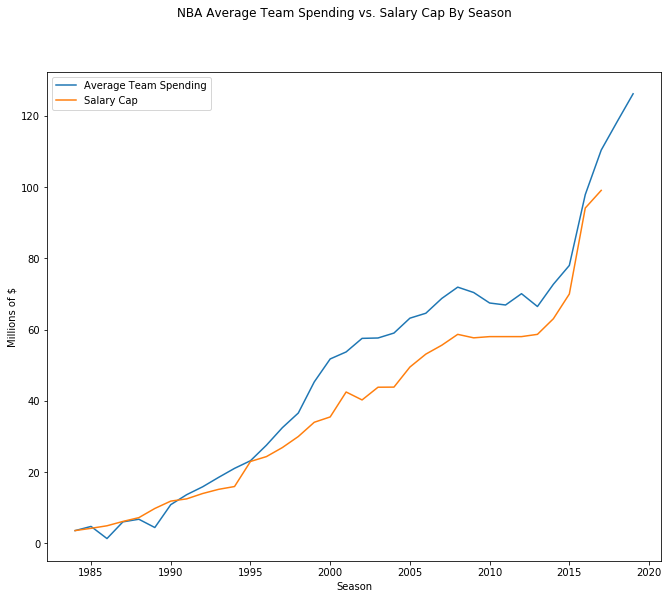

In [232]:
#Used the salary data collected by our team

salaries = pd.read_csv("salaries_85.csv")
salDrop = salaries[['team', 'season', 'salary']]

#salDrop.groupby(['team', 'season']).agg(len)
# ^ Is this normal or could our salary data be limited for this graph?

salDrop['salary'] = salDrop['salary'].str.replace('$', '').str.replace('\.00', '').str.replace('\,', '')
salDrop['salary'] = salDrop['salary'].astype(int)

salTeamSums = salDrop.groupby(['team','season']).agg(sum)
salTeamSums = salTeamSums.reset_index()

salSeasonAvgs = salTeamSums.drop(columns = ['team']).groupby('season').mean()
salSeasonAvgs['salary'] = salSeasonAvgs['salary'] / 1000000

salSeasonAvgs = salSeasonAvgs.reset_index()
salSeasonAvgs['season'] = salSeasonAvgs['season'].str.replace('-\d+', '')
salSeasonAvgs['season'] = salSeasonAvgs['season'].astype(int)

salAvgAndCap = salSeasonAvgs.merge(salaryPlot, on = 'season', how = 'left')
salAvgAndCap = salAvgAndCap.set_index('season')
salAvgAndCap = salAvgAndCap.rename(columns = {'salary' : 'Average Team Spending'})
salAvgAndCap.plot.line(figsize = (11,9))

plt.xlabel('Season')
plt.ylabel('Millions of $')
plt.suptitle('NBA Average Team Spending vs. Salary Cap By Season')

<ipython-input-231-cd7d939a5de5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salGSW['salary'] = salGSW['salary']/1000000
<ipython-input-231-cd7d939a5de5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salGSW['season'] = salGSW['season'].str.replace('-\d+', '')
<ipython-input-231-cd7d939a5de5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

Text(0.5, 0.98, 'Golden State Warriors Team Spending vs. Salary Cap By Season')

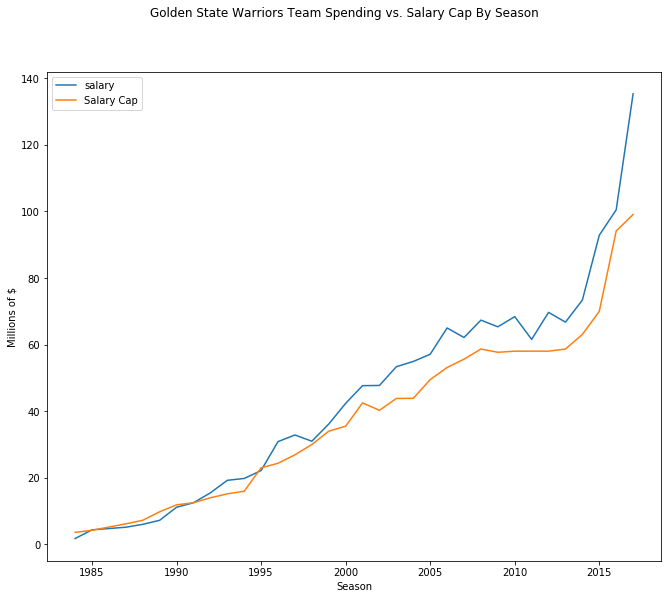

In [231]:
salGSW = salGroup[salGroup['team'] == 'Golden State Warriors']
salaryCapReset = salaryCapActual.reset_index()
salGSW['salary'] = salGSW['salary']/1000000

salGSW['season'] = salGSW['season'].str.replace('-\d+', '')
salGSW['season'] = salGSW['season'].astype(int)


salGSW = salGSW.merge(salaryPlot, on = 'season', how = 'left').dropna()
salGSW = salGSW.drop(columns = ['team']).set_index('season')
salGSW = salGSW.rename({'salary' : 'Total Salary'})
salGSW.plot.line(figsize = (11,9))

plt.xlabel('Season')
plt.ylabel('Millions of $')
plt.suptitle('Golden State Warriors Team Spending vs. Salary Cap By Season')